In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

pd.pandas.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv('/content/heart_disease_uci.csv')
print(df.shape)
print(type(df))

(920, 16)
<class 'pandas.core.frame.DataFrame'>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.drop("id",axis=1,inplace=True)

#"id"--this feature plays no role in the predictions so we have dropped it completely

In [7]:
numerical_features=[features for features in df.columns if df[features].dtype!="object"]
numerical_with_na=[features for features in numerical_features if df[features].isnull().sum()>1]

In [8]:
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [9]:
numerical_with_na

['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [10]:
categorical_features=[features for features in df.columns if df[features].dtype=="object"]
categorical_with_na=[features for features in categorical_features if df[features].isnull().sum()>1]

In [11]:
categorical_features

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [12]:
categorical_with_na

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [13]:
discrete_features=[features for features in numerical_features if len(df[features].unique())<25]
discrete_features

['ca', 'num']

In [14]:
continuous_features=[features for features in numerical_features if features not in discrete_features]
continuous_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [15]:
df[numerical_with_na].isnull().sum()

,0
trestbps,59
chol,30
thalch,55
oldpeak,62
ca,611


In [16]:
df[categorical_with_na].isnull().sum()

,0
fbs,90
restecg,2
exang,55
slope,309
thal,486


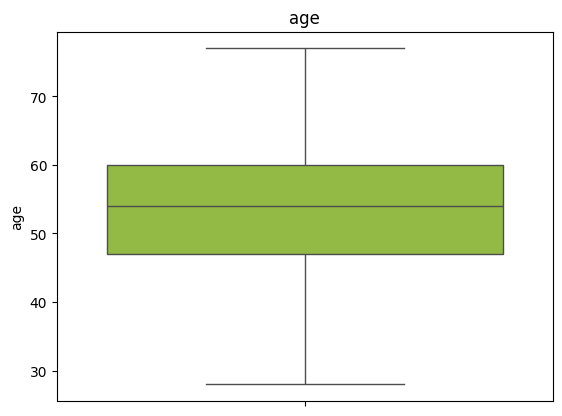

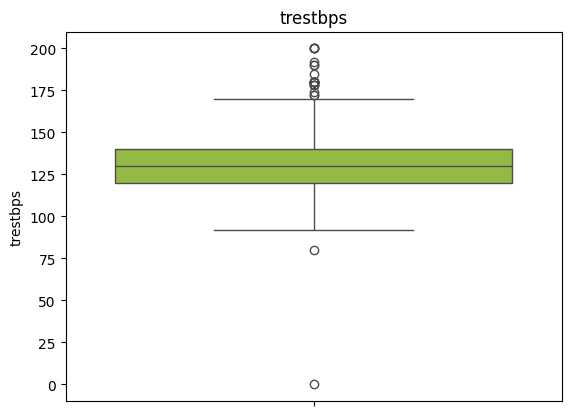

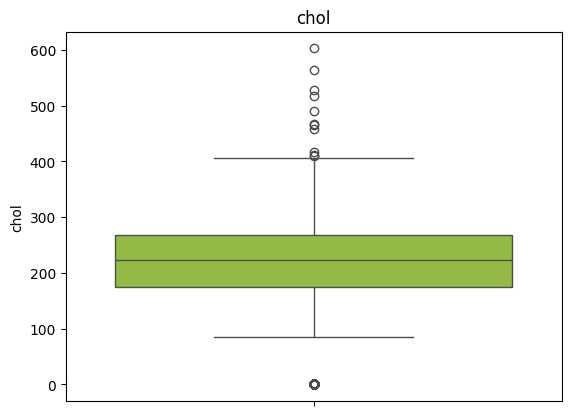

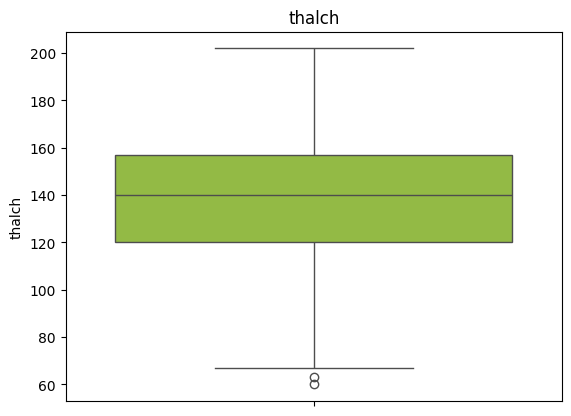

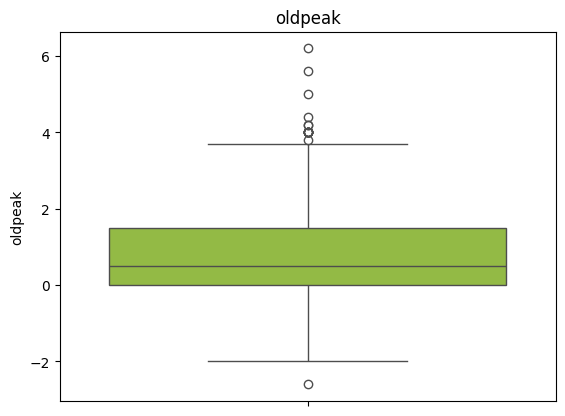

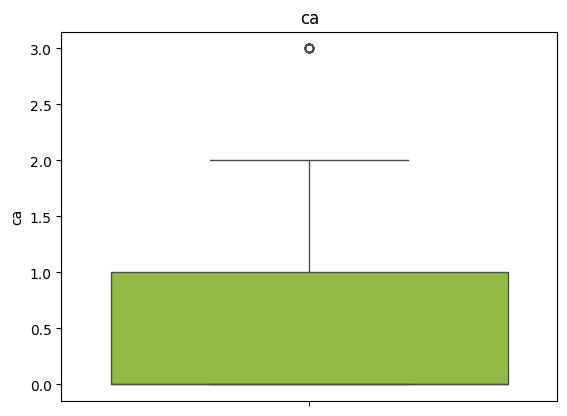

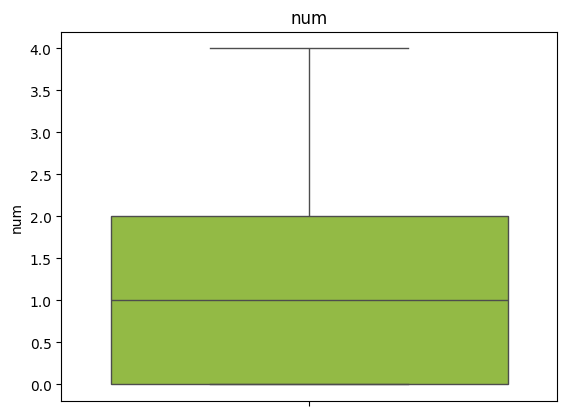

In [17]:
#FOR NUMERICAL FEATURES---DETECTION OF OUTLIERS IS DONE THROUGH BOX PLOT SO THAT WE CAN DECIDE ON WHICH IMPUTATION(MEAN OR MEDIAN) TO USE TO FILL NaN VALUES

for feature in numerical_features:
  sns.boxplot(df[feature],color="yellowgreen")
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()



#"trestbps"--few outliers
#"chol"--few outliers
#"talch"--2 outliers
#"oldpeak"--few outliers
#"ca"--1 outlier

#BEST METHOD TO HANDLE NaN VALUES IN CASE OF OUTLIERS IN NUMERICAL_FEATURES-"MEDIAN VALUE IMPUTATION"

/tmp/ipython-input-3243758261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["num"],y=df["chol"],palette="Set2")


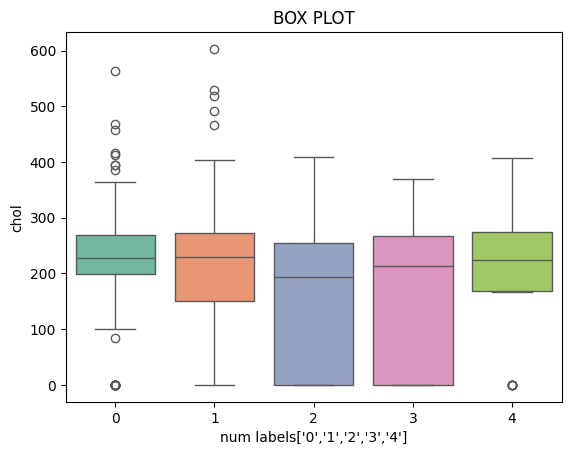

In [18]:
#PLOTTING BOXPLOTS--LINKING NUMERICAL FEATURES WITH TARGET VARIABLE("num")

sns.boxplot(x=df["num"],y=df["chol"],palette="Set2")
plt.xlabel("num labels['0','1','2','3','4']")
plt.ylabel("chol")
plt.title("BOX PLOT")
plt.show()

/tmp/ipython-input-2286722709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num",y="thalch",data=df,palette="Set1")


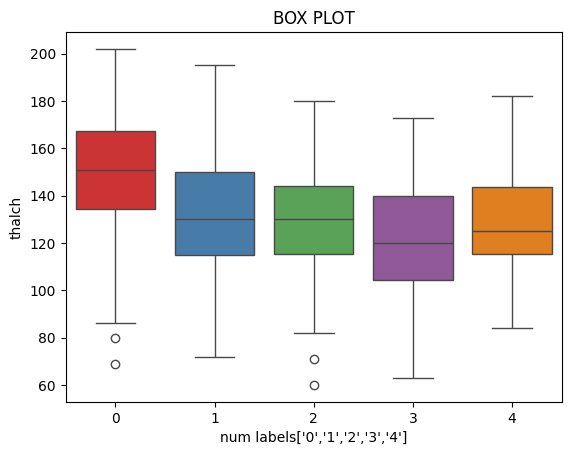

In [19]:
sns.boxplot(x="num",y="thalch",data=df,palette="Set1")
plt.xlabel("num labels['0','1','2','3','4']")
plt.ylabel("thalch")
plt.title("BOX PLOT")
plt.show()

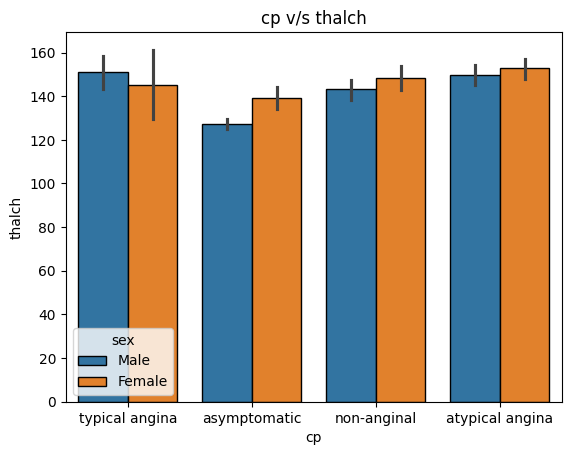

In [20]:
sns.barplot(x=df["cp"],y=df["thalch"],hue=df["sex"],edgecolor="black")
plt.xlabel("cp")
plt.ylabel("thalch")
plt.title("cp v/s thalch")
plt.show()


#THIS BAR PLOT GIVES THE FOLLOWING INSIGHTS
#INSIGHTS---PEOPLE WITH DIFFERENT CHEST PAIN CONDITIONS AND THE MEASURE OF THEIR MAXIMUM HEART RATE
#WE HAVE ALSO DISTINGUISHED FOR BOTH SEXES--MALES AND FEMALES TO SHOW COMPARSION ON THE BAISS OF GENDER AS WELL

In [21]:
for feature in numerical_with_na:
  df[feature]=df[feature].fillna(df[feature].median())

#HANDLING NaN VALUES IN CASE OF OUTLIERS IN NUEMRICAL KEEPS THE DATA IN CHECK

In [22]:
df[numerical_with_na].isnull().sum()

,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0


In [23]:
df[categorical_with_na].isnull().sum()

,0
fbs,90
restecg,2
exang,55
slope,309
thal,486


In [24]:
df["fbs"].value_counts()

,count
fbs,
False,692
True,138


In [25]:
df["restecg"].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [26]:
df["exang"].value_counts()

,count
exang,
False,528
True,337


In [27]:
df["slope"].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [28]:
df["thal"].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [29]:
#FBS---FASTING BLOOD SUGAR.THIS DATA IS NATURALLY IMBALANCED IN REAL POPULATIONS.SO THERE IS NO NEED TO TRY AND BALANCE THE DATASET
#SINCE MAJORITY OF THE POPULATION HAS "FALSE" AS FBS THUS THE LOGICAL IDEA WOULD BE TO FILL THE MISSING VALUES WITH "MODE" OF THE COLUMN


#resrecg--RESTING ELECTROCARDIOGRAPHIC RESULTS.THIS DATA IS ALSO NATURALLY IMBALANCED IN REAL POPULATIONS
#THE BEST METHOD TO HANDLE MISSING VALUES IS TO FILL THE NaN VALUES WITH "NORMAL" CATEGORY


#exang---EXERCISE INDUCED ANGIA.THIS DATA IS NATURALLY IMBALANCED IN REAL POPULATIONS.SO THERE IS NO NEED TO TRY AND BALANCE TEH DATASET
#BEST METHOD TO HANDLE THE NaN VALUES WILL BE TO FILL WITH THE "MODE" OF THE COLUMN


#slope---THERE ARE MANY MISSING VALUES IN THE SLOPE COLUMN.SO THIS MUST BE HANDLED WITH EXTREME CARE

#thal--LIKE "SLOPE" THIS TOO MUST BE HANDLED WITH CARE

In [30]:
df["fbs"].fillna(False,inplace=True)

/tmp/ipython-input-865172005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fbs"].fillna(False,inplace=True)
/tmp/ipython-input-865172005.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["fbs"].fillna(False,inplace=True)


In [31]:
df["restecg"].fillna("normal",inplace=True)

/tmp/ipython-input-859713840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["restecg"].fillna("normal",inplace=True)


In [32]:
df["exang"].fillna(False,inplace=True)

/tmp/ipython-input-1656901420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["exang"].fillna(False,inplace=True)
/tmp/ipython-input-1656901420.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["exang"].fillna(False,inplace=True)


In [33]:
df["fbs"].value_counts()

,count
fbs,
False,782
True,138


In [34]:
df["exang"].value_counts()

,count
exang,
False,583
True,337


In [35]:
print(df["fbs"].isnull().sum())
print(df["exang"].isnull().sum())
print(df["restecg"].isnull().sum())

0
0
0


In [36]:
df["sex"].value_counts()

,count
sex,
Male,726
Female,194


In [37]:
df["ca"].value_counts()

,count
ca,
0.0,792
1.0,67
2.0,41
3.0,20


In [38]:
continuous_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

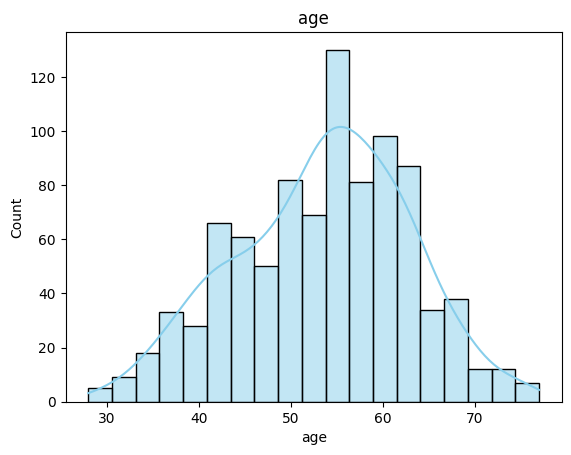

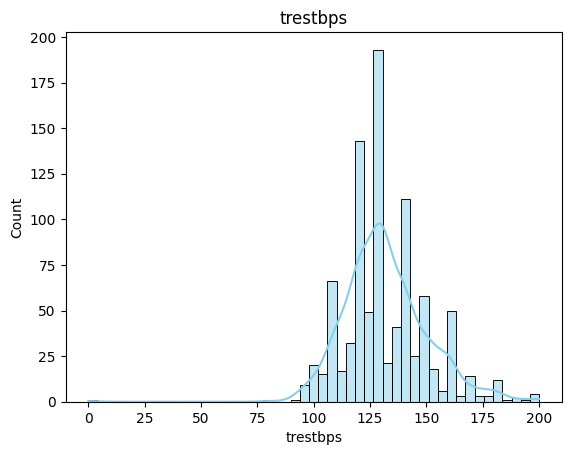

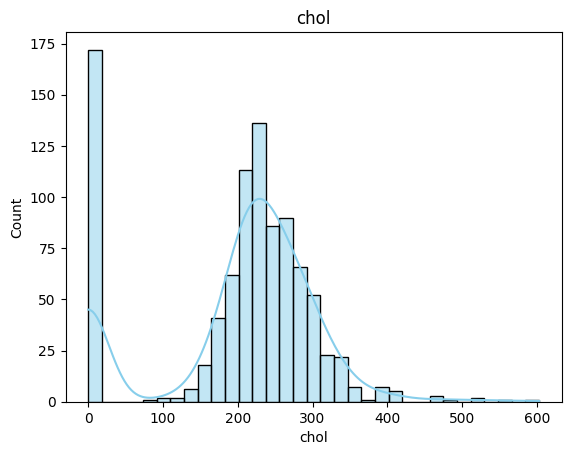

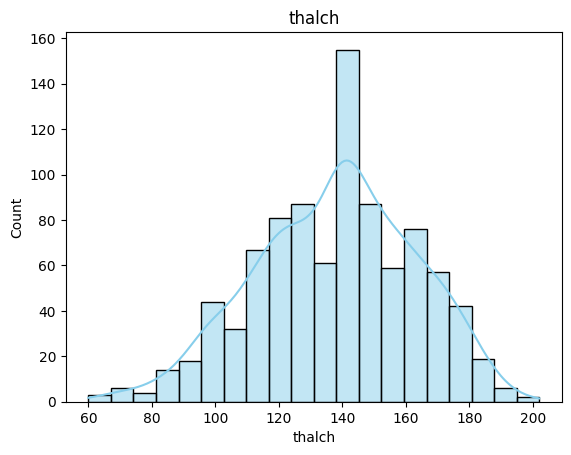

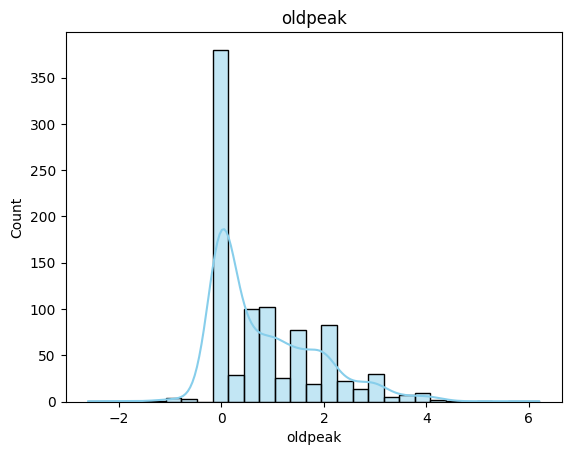

In [39]:
#FOR THE CONTINUOUS FEATURES WE SHOULD CREATE HISTOGRAMS
#THE REASON FOR CHOOSING HISTOGRAM IS TO STUDY THE DISTRIBUTION OF OUR CONTINUOUS FEATURES AND DRAW CONCLUSIONS WHETHER TO NORMALIZE CERTAIN FEATURES OR NOT


for feature in continuous_features:
  sns.histplot(df[feature],color="skyblue",edgecolor="black",kde=True)
  plt.xlabel(feature)
  plt.title(feature)
  plt.show()


#"age"---normally distributed
#"trestbps"--not completely normally distributed but quite close enough
#"chol"---A HUGE PROBLEM WE HAVE TO ADRESS THE ISSUE RELATED TO CHOL--"0"
#"thalch"---almost normally distributed
#"oldpeak"--we should use log1p method to scale the data


#CONCLUSION---WE MUST HANDLE THE 0 VALUE IN CHOL DATASET AND NORMALIZE "OLDPEAK" COLUMN.REST ALL FEATURES ARE NEARLY NORMALIZED

In [40]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<Axes: xlabel='age', ylabel='chol'>

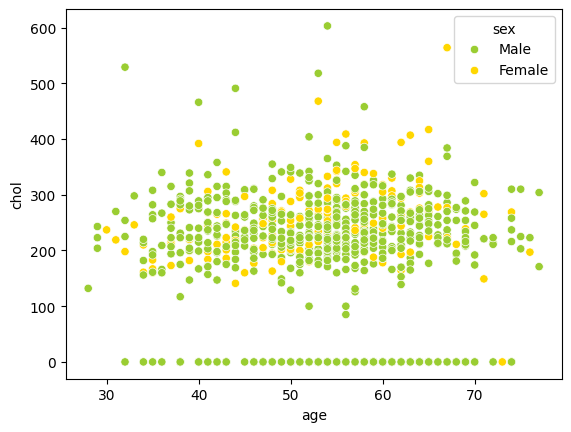

In [41]:
sns.scatterplot(x=df["age"],y=df["chol"],hue=df["sex"],palette=["yellowgreen","gold"])

#CLEARLY CHOL--0 IS EXTREMELY RARE IN REAL LIFE.SO WE NEED TO HANDLE IT AND REPLACE THE DATASET THAT HAS CHOL-0 WITH THE MEAN OR MEDIAN

In [42]:
df[df["chol"]==0]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,32,Male,Switzerland,typical angina,95.0,0.0,False,normal,127.0,False,0.7,upsloping,0.0,NaN,1
598,34,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,154.0,False,0.2,upsloping,0.0,NaN,1
599,35,Male,Switzerland,asymptomatic,130.0,0.0,False,normal,130.0,True,0.5,NaN,0.0,reversable defect,3
600,36,Male,Switzerland,asymptomatic,110.0,0.0,False,normal,125.0,True,1.0,flat,0.0,fixed defect,1
601,38,Female,Switzerland,asymptomatic,105.0,0.0,False,normal,166.0,False,2.8,upsloping,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,0.0,NaN,1
819,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,0.0,NaN,0
822,48,Male,VA Long Beach,non-anginal,102.0,0.0,False,st-t abnormality,110.0,True,1.0,downsloping,0.0,NaN,1
839,56,Male,VA Long Beach,asymptomatic,130.0,0.0,False,lv hypertrophy,140.0,False,0.5,NaN,0.0,NaN,1


In [43]:
median_chol_value=df.loc[df["chol"],"chol"].median()
print(median_chol_value)

233.0


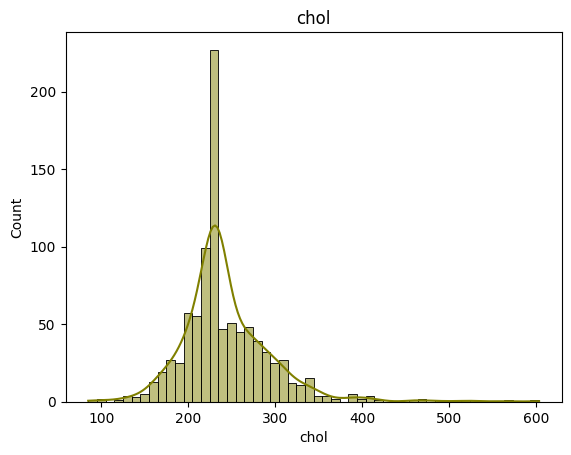

In [44]:
#REPLACING THE VALUES OF CHOL-0 WITH THE MEDIAN VALUE
df["chol"]=df["chol"].replace(0,median_chol_value)

sns.histplot(df["chol"],color="olive",kde=True)
plt.xlabel("chol")
plt.title("chol")
plt.show()



#THERE IS STILL LONG RIGHT TAIL..WE NEED TO EPRFORM LOG NORMAL TRANSFORMATION BECAUSE WE ARE USING LOGISTIC REGRESSION ALGORITHM
#FOR KNN NEIGHBORS STANDARDIZATION IS ESSENTIAL A MUST DO

<Axes: xlabel='age', ylabel='chol'>

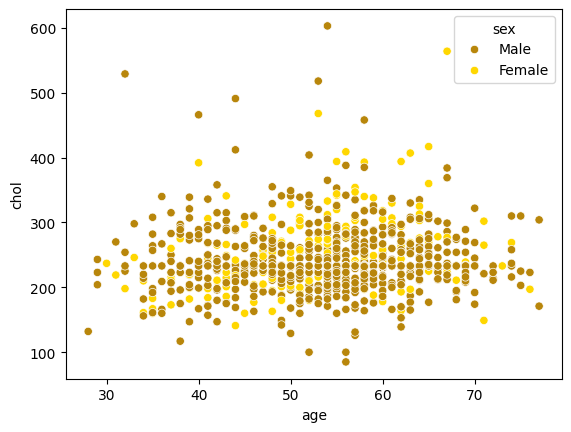

In [45]:
sns.scatterplot(x=df["age"],y=df["chol"],hue=df["sex"],palette=["darkgoldenrod","gold"])

In [46]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<Axes: xlabel='trestbps', ylabel='chol'>

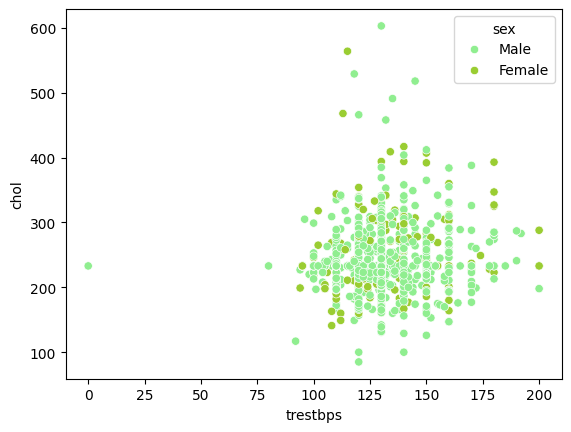

In [47]:
#SCATTER PLOT BETWEEN "TRESTBPS" AND "CHOL"
sns.scatterplot(x=df["trestbps"],y=df["chol"],hue=df["sex"],palette=["lightgreen","yellowgreen"])

<Axes: xlabel='age', ylabel='trestbps'>

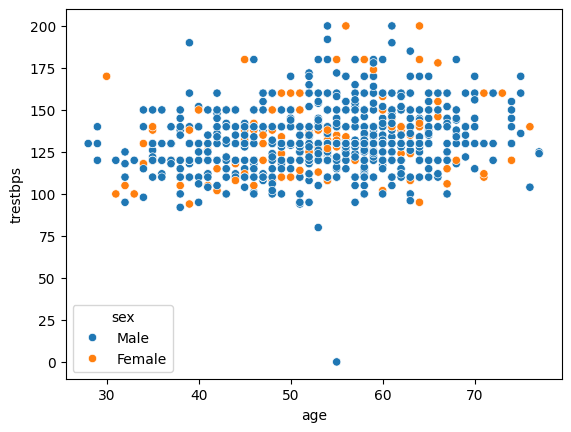

In [48]:
#SCATTERPLOT BETWEEN "AGE" AND "TRESTBPS"
sns.scatterplot(x=df["age"],y=df["trestbps"],hue=df["sex"])

In [49]:
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [50]:
df[categorical_with_na].isnull().sum()

,0
fbs,0
restecg,0
exang,0
slope,309
thal,486


In [51]:
df["sex"]=df["sex"].map({"Male":1,"Female":0})

In [52]:
df["exang"]=df["exang"].map({True:1,False:0})


In [53]:
df["fbs"]=df["fbs"].map({True:1,False:0})

In [54]:
df["dataset"].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [55]:
encoded_data=pd.get_dummies(df["dataset"],drop_first=True,prefix="Location",columns=["dataset"],dtype=int)
df=pd.concat([df,encoded_data],axis=1)

In [56]:
df.drop("dataset",axis=1,inplace=True)

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0,0,0,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2,0,0,0
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1,0,0,0
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0,0,0,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0,0,0,0


In [58]:
df["restecg"].value_counts()

,count
restecg,
normal,553
lv hypertrophy,188
st-t abnormality,179


In [59]:
df["cp"].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [60]:
#BASED ON RESEARCH ON GOOGLE WE WILL ASSUME THAT THE CATGEORIES IN COLUMN "cp" HAVE NO HIERARCHY AND WILL USE ONE-HOT-ENCODING VIA pd.get_dummies()
#SIMILARLY THE COLUMN "restecg" WILL BE ENCODED VIA pd.get_dummies()

encoded_data=pd.get_dummies(df[["restecg","cp"]],columns=["restecg","cp"],dtype=int,drop_first=True)
encoded_data

,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
915,0,1,0,0,0
916,0,1,0,0,1
917,0,1,0,0,0
918,0,0,0,0,0


In [61]:
df=pd.concat([df,encoded_data],axis=1)
df.drop(["restecg","cp"],axis=1,inplace=True)

In [62]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed defect,0,0,0,0,0,0,0,0,1
1,67,1,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,2,0,0,0,0,0,0,0,0
2,67,1,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable defect,1,0,0,0,0,0,0,0,0
3,37,1,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,0,0,0,0,1,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0,0,0,0,0,0,1,0,0


In [63]:
df["slope_encoded"]=df["slope"].map({"upsloping":0,"flat":1,"downsloping":2})
df["slope_encoded"]=df["slope_encoded"].fillna(df["slope_encoded"].median())

In [64]:
df.drop("slope",axis=1,inplace=True)

In [65]:
df["thal"].isnull().sum()

np.int64(486)

In [66]:
df["thal"].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [67]:
df["thal_encoded"]=df["thal"].map({"normal":0,"reversable defect":1,"fixed defect":2})
df["thal_enocded"]=df["thal_encoded"].fillna(df["thal_encoded"].median())

In [68]:
df.drop("thal",axis=1,inplace=True)

In [69]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded,thal_enocded
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,0,0,0,0,0,0,0,1,2.0,2.0,2.0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,0,0,0,0,0,0,0,0,1.0,0.0,0.0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,0,0,0,1,0,0,1,0,2.0,0.0,0.0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0


In [70]:
#LOG NORMAL DISTRIBUTION

df["oldpeak"]=np.log1p(df["oldpeak"])
df["chol"]=np.log1p(df["chol"])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


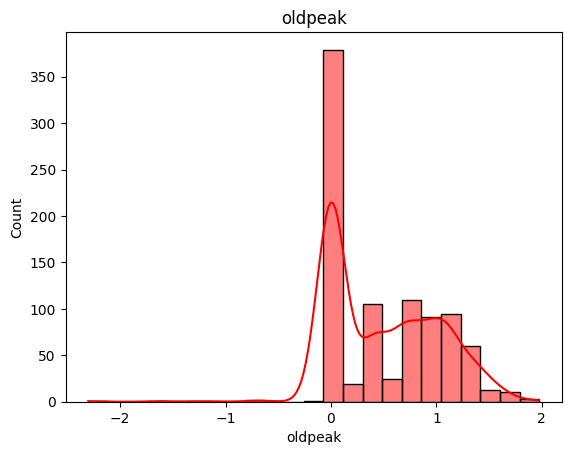

In [71]:
sns.histplot(df["oldpeak"],color="red",kde=True)
plt.xlabel("oldpeak")
plt.title("oldpeak")
plt.show()

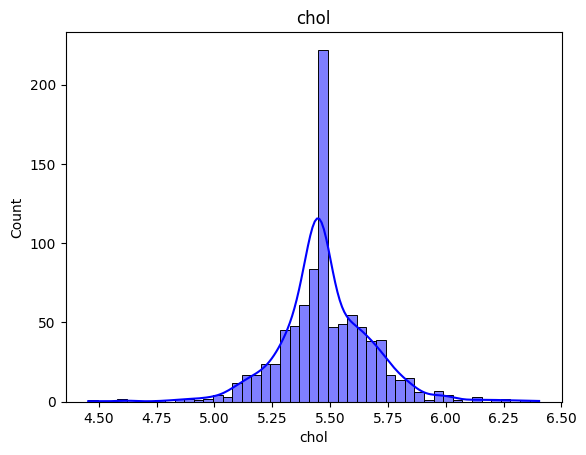

In [72]:
sns.histplot(df["chol"],color="blue",kde=True)
plt.xlabel("chol")
plt.title("chol")
plt.show()

In [73]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded,thal_enocded
0,63,1,145.0,5.455321,1,150.0,0,1.193922,0.0,0,0,0,0,0,0,0,0,1,2.0,2.0,2.0
1,67,1,160.0,5.659482,0,108.0,1,0.916291,3.0,2,0,0,0,0,0,0,0,0,1.0,0.0,0.0
2,67,1,120.0,5.438079,0,129.0,1,1.280934,2.0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0
3,37,1,130.0,5.525453,0,187.0,0,1.504077,0.0,0,0,0,0,1,0,0,1,0,2.0,0.0,0.0
4,41,0,130.0,5.323010,0,172.0,0,0.875469,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0


In [74]:
df["thal_encoded"].isnull().sum()
df["thal_encoded"]=df["thal_encoded"].fillna(df["thal_encoded"].median())

df.drop("thal_enocded",axis=1,inplace=True)

In [75]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded
0,63,1,145.0,5.455321,1,150.0,0,1.193922,0.0,0,0,0,0,0,0,0,0,1,2.0,2.0
1,67,1,160.0,5.659482,0,108.0,1,0.916291,3.0,2,0,0,0,0,0,0,0,0,1.0,0.0
2,67,1,120.0,5.438079,0,129.0,1,1.280934,2.0,1,0,0,0,0,0,0,0,0,1.0,1.0
3,37,1,130.0,5.525453,0,187.0,0,1.504077,0.0,0,0,0,0,1,0,0,1,0,2.0,0.0
4,41,0,130.0,5.323010,0,172.0,0,0.875469,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0


In [76]:
df["sex"].value_counts()

,count
sex,
1,726
0,194


In [77]:
df["fbs"].value_counts()

,count
fbs,
0,782
1,138


In [78]:
df["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


<Axes: >

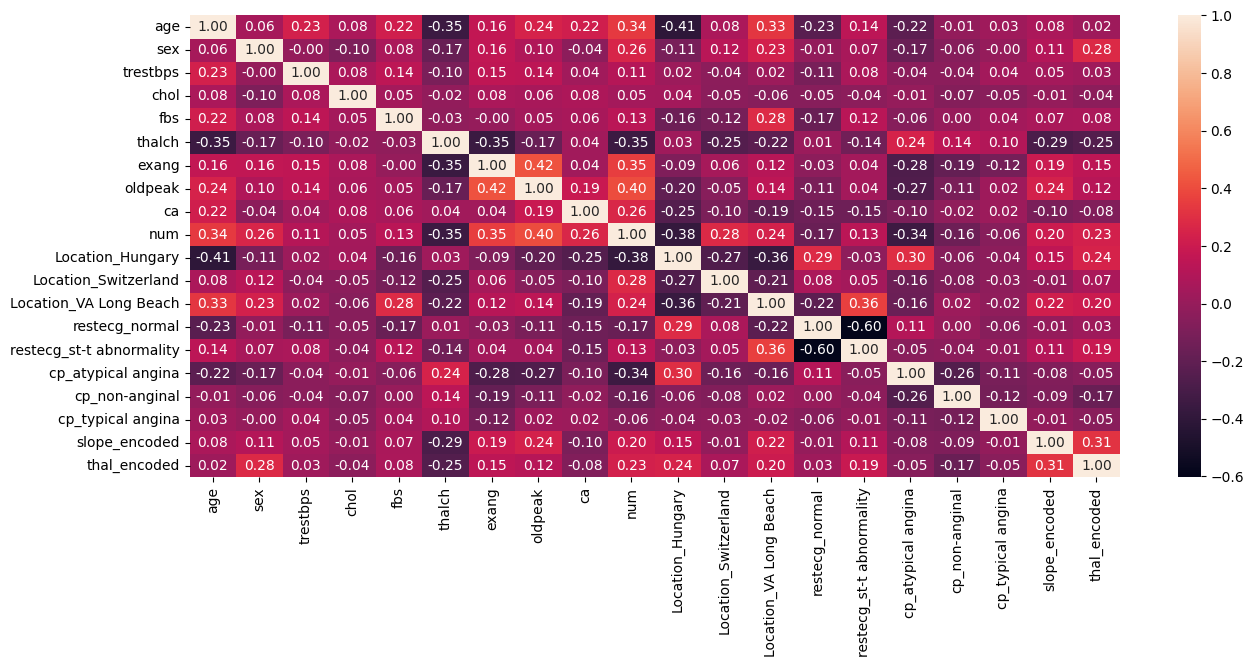

In [79]:
#CREATING HEATMAP TO STUDY THE CORELATION OF DIFFERENT FEATURES AGAINST EACH OTHER AND DRAWING CONCLUSIONS

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

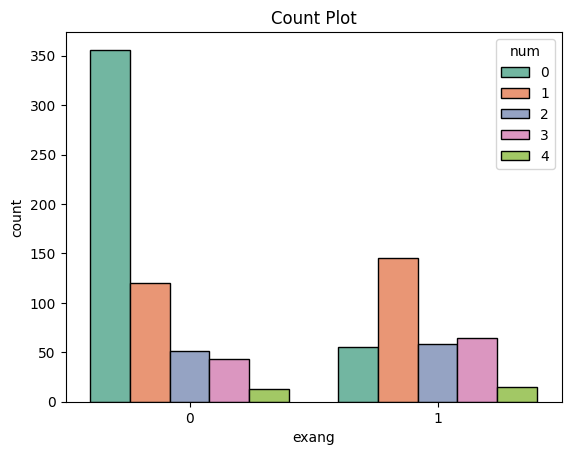

In [80]:
sns.countplot(data=df,x="exang",hue="num",palette="Set2",edgecolor="black")
plt.xlabel("exang")
plt.ylabel("count")
plt.title("Count Plot")
plt.show()


#"exang"----BINARY VARIABLE
#THIS PLOT DEPICTS THAT HOW PEOPLE WHO HAVE OR DON'T HAVE INDUCED-PAIN-ANGIA ACTUALLY HAVE HEART DISEASE(represented by "num")

In [81]:
#0---NO HEART DISEASE(<50% DIAMETER NARROWING)
#1---PRESENCE OF HEART DISEASE(>50% DIAMETER NARROWING)

df["num"]=df["num"].map({0:0,1:1,2:1,3:1,4:1})
df["num"].value_counts()

,count
num,
1,509
0,411


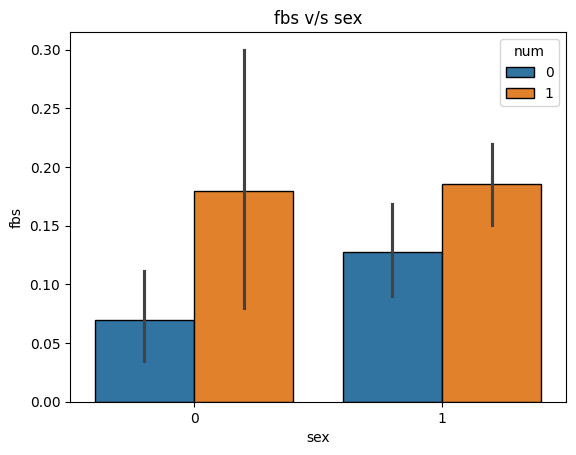

In [82]:
sns.barplot(x=df["sex"],y=df["fbs"],hue=df["num"],edgecolor="black")
plt.xlabel("sex")
plt.ylabel("fbs")
plt.title("fbs v/s sex")
plt.show()

#1--HEART DISEASE AND 0--NO HEART DISEASE
#X--axis "sex"
#Y--axis "fbs"


#INSIGHTS---(FEMALES--0 WHO HAVE HEART DISEASE--"ORANGE BAR" HAVE A HIGHER "fbs"--FASTING BLOOD SUGAR)
#INSIGHTS---(MALES--1 WHO HAVE HEART DISEASE--"ORANGE BAR" HAVE A SLIGHTLY HIGHER "fbs"---FASTING BLOOD SUGAR THAN THE MALES WHO DON'T HAVE HEART DISEASE)


In [83]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded
0,63,1,145.0,5.455321,1,150.0,0,1.193922,0.0,0,0,0,0,0,0,0,0,1,2.0,2.0
1,67,1,160.0,5.659482,0,108.0,1,0.916291,3.0,1,0,0,0,0,0,0,0,0,1.0,0.0
2,67,1,120.0,5.438079,0,129.0,1,1.280934,2.0,1,0,0,0,0,0,0,0,0,1.0,1.0
3,37,1,130.0,5.525453,0,187.0,0,1.504077,0.0,0,0,0,0,1,0,0,1,0,2.0,0.0
4,41,0,130.0,5.323010,0,172.0,0,0.875469,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0


In [84]:
X=df.drop("num",axis=1)
y=df["num"]

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(736, 19)
(184, 19)
(736,)
(184,)


In [86]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded
880,62,1,130.0,5.141664,0,120.0,1,1.386294,0.0,0,0,1,0,1,0,0,0,1.0,1.0
457,54,1,150.0,5.411646,0,122.0,0,0.000000,0.0,1,0,0,1,0,0,1,0,1.0,1.0
797,51,1,130.0,5.828946,0,140.0,0,0.405465,0.0,0,0,1,1,0,0,1,0,1.0,1.0
25,50,0,120.0,5.393628,0,158.0,0,0.955511,0.0,0,0,0,1,0,0,1,0,1.0,0.0
84,52,1,120.0,5.786897,0,172.0,0,0.182322,0.0,0,0,0,1,0,1,0,0,0.0,0.0


In [87]:
X_train.isnull().sum()

#there is an unexpected error for 4 NaN values in "oldpeak" column despite fixing it before

,0
age,0
sex,0
trestbps,0
chol,0
fbs,0
thalch,0
exang,0
oldpeak,4
ca,0
Location_Hungary,0


In [88]:
X_test.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,Location_Hungary,Location_Switzerland,Location_VA Long Beach,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_encoded,thal_encoded
319,36,1,120.0,5.117994,0,180.0,0,0.000000,0.0,1,0,0,1,0,1,0,0,1.0,1.0
377,45,1,140.0,5.416100,1,122.0,0,0.000000,0.0,1,0,0,1,0,1,0,0,1.0,1.0
538,48,1,160.0,5.799093,0,92.0,1,0.916291,0.0,1,0,0,1,0,0,0,0,1.0,1.0
296,59,1,164.0,5.176150,1,90.0,0,0.693147,2.0,0,0,0,0,0,0,0,0,1.0,2.0
531,40,0,150.0,5.973810,0,130.0,0,1.098612,0.0,1,0,0,1,0,0,0,0,1.0,2.0


In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Replace infinite values with NaN for easier imputation
X_train_cleaned = X_train.replace([np.inf, -np.inf], np.nan)
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan)

# Impute NaN values in each column with the median of that column from the training set
for column in X_train_cleaned.columns:
    if X_train_cleaned[column].isnull().any():
        median_val = X_train_cleaned[column].median()


        X_train_cleaned[column].fillna(median_val, inplace=True)
        X_test_cleaned[column].fillna(median_val, inplace=True)


X_train_scaled=scaler.fit_transform(X_train_cleaned)
X_test_scaled=scaler.transform(X_test_cleaned)

/tmp/ipython-input-934001506.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_cleaned[column].fillna(median_val, inplace=True)
/tmp/ipython-input-934001506.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [90]:
X_train_scaled

array([[ 0.90241255,  0.50593744, -0.08394637, ..., -0.23007121,
         0.29180017,  0.34769504],
       [ 0.03477619,  0.50593744,  0.98777137, ..., -0.23007121,
         0.29180017,  0.34769504],
       [-0.29058745,  0.50593744, -0.08394637, ..., -0.23007121,
         0.29180017,  0.34769504],
       ...,
       [ 2.31232163,  0.50593744,  1.52363024, ..., -0.23007121,
         2.15932129,  0.34769504],
       [-0.07367836, -1.97652894,  0.4519125 , ..., -0.23007121,
         0.29180017,  0.34769504],
       [ 0.36013982, -1.97652894, -0.19111814, ..., -0.23007121,
        -1.57572094, -1.68328551]])

In [91]:
X_test_scaled

array([[-1.91740563,  0.50593744, -0.61980524, ..., -0.23007121,
         0.29180017,  0.34769504],
       [-0.94131472,  0.50593744,  0.4519125 , ..., -0.23007121,
         0.29180017,  0.34769504],
       [-0.61595109,  0.50593744,  1.52363024, ..., -0.23007121,
         0.29180017,  0.34769504],
       ...,
       [ 0.793958  ,  0.50593744, -0.61980524, ..., -0.23007121,
         0.29180017,  0.34769504],
       [ 0.14323073,  0.50593744, -0.61980524, ..., -0.23007121,
         0.29180017,  0.34769504],
       [ 0.90241255,  0.50593744, -1.15566411, ..., -0.23007121,
         0.29180017, -1.68328551]])

In [92]:
#1ST LGORITHM-----LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train_scaled,y_train)

LogisticRegression()

In [93]:
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [94]:
y_test

,num
319,0
377,0
538,1
296,1
531,1
...,...
382,0
97,1
906,1
467,0


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[62, 13],
       [19, 90]])

In [96]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
print("THE ACCURACY SCORE IS: ",accuracy_score(y_test,y_pred))
print("THE RECALL SCORE IS: ",recall_score(y_test,y_pred))
print("THE PRECISION SCORE IS: ",precision_score(y_test,y_pred))
print("THE F1_SCORE IS: ",f1_score(y_test,y_pred))

THE ACCURACY SCORE IS:  0.8260869565217391
THE RECALL SCORE IS:  0.8256880733944955
THE PRECISION SCORE IS:  0.8737864077669902
THE F1_SCORE IS:  0.8490566037735849


In [97]:
#WE HAVE DONE NP.LOG1P FUNCTION FOR NORMAL DISTRIBUTION OF CONTINUOUS DATA WHEN IS PARTICULARLY IMPORTANT FOR LOGISTIC REGRESSION

In [98]:
#KNN---SECOND MODEL


#FOR KNN---STANDARD SCALING IS EXTREMELY IMPORTANT BECAUSE IT CALCULATES THE ACTUAL DISTANCE BETWEEN THE DATAPOINTS..

KNN CALCULATES THE DISTANCE BETWEEN. THE DATA POINTS TO CALCULATE THE NEAREST NEIGHBORS..STANDARD SCALING SCALES THE DATA BETWEEN THE RANGE OF [-1,1] WHICH IS VERY IMPORTANT..IF WE DONT DO STANDARD SCALING THERE WILL BE A HUGE DROP IN THE ACCURACY OF OUR MODEL.

CASE--1 WHEN K=3[NEAREST_NEIGHBORS ARE 3]

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred=knn.predict(X_test_scaled)

In [101]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1])

In [102]:
y_test

,num
319,0
377,0
538,1
296,1
531,1
...,...
382,0
97,1
906,1
467,0


In [103]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[65, 10],
       [19, 90]])

In [104]:
print("THE ACCURACY SCORE IS: ",accuracy_score(y_test,y_pred))
print("THE RECALL SCORE IS: ",recall_score(y_test,y_pred))
print("THE F1 SCORE IS: ",f1_score(y_test,y_pred))
print("THE PRECISION SCORE IS: ",precision_score(y_test,y_pred))

THE ACCURACY SCORE IS:  0.842391304347826
THE RECALL SCORE IS:  0.8256880733944955
THE F1 SCORE IS:  0.861244019138756
THE PRECISION SCORE IS:  0.9


CASE 2---WHEN K=5[NEAREST NEIGHBORS ARE 5]

In [105]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)

In [106]:
confusion_matrix(y_test,y_pred)

array([[66,  9],
       [22, 87]])

In [107]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1])

In [108]:
y_test

,num
319,0
377,0
538,1
296,1
531,1
...,...
382,0
97,1
906,1
467,0


In [109]:
print("THE ACCURACY SCORE IS: ",accuracy_score(y_test,y_pred))
print("THE RECALL SCORE IS: ",recall_score(y_test,y_pred))
print("THE F1 SCORE IS: ",f1_score(y_test,y_pred))
print("THE PRECISION SCORE IS: ",precision_score(y_test,y_pred))

THE ACCURACY SCORE IS:  0.8315217391304348
THE RECALL SCORE IS:  0.7981651376146789
THE F1 SCORE IS:  0.848780487804878
THE PRECISION SCORE IS:  0.90625


CASE 3---WHEN THE VALUE OF K=7[NEAREST NEIGHBORS ARE 7]

In [110]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)

In [111]:
confusion_matrix(y_test,y_pred)

array([[64, 11],
       [19, 90]])

In [112]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1])

In [113]:
y_test

,num
319,0
377,0
538,1
296,1
531,1
...,...
382,0
97,1
906,1
467,0


In [114]:
print("THE ACCURACY SCORE IS: ",accuracy_score(y_test,y_pred))
print("THE RECALL SCORE IS: ",recall_score(y_test,y_pred))
print("THE F1 SCORE IS: ",f1_score(y_test,y_pred))
print("THE PRECISION SCORE IS: ",precision_score(y_test,y_pred))

THE ACCURACY SCORE IS:  0.8369565217391305
THE RECALL SCORE IS:  0.8256880733944955
THE F1 SCORE IS:  0.8571428571428571
THE PRECISION SCORE IS:  0.8910891089108911


WE USED 3,5,7 AS THE DIFFERENT VALUES FOR NEAREST NEIGHBORS
THE BEST ACCURACY,PRECISION,F1,RECALL SCORE COMES OUT FOR WHEN K=3

In [115]:
#K=3 RECALL SCORE=0.8256
#K=5 RECALL SCORE=0.798
#K=7 RECALL SCORE=0.8256


#THE QUESTION SAYS THAT WE WANT TO MINIMIZE THE FALSE NEGATIVES

CONFUSION MATRIX

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[64, 11],
       [19, 90]])

THE GIVEN DATASET HAS TARGET VARIABLE AS "num"---IT PREDICTS 0---NO HEART DISEASE AND 1---HEART DISEASE PERSISTS

WE WANT TO MINIMIZE FALSE NEGATIVES BECAUSE WE DON'T WANT OUR MODEL TO PREDICT NO HEART DISEASE FOR A PERSON WHO IS ACTUALLY SUFFERING FROM HEART DISEASE WHICH WILL BE VERY WRONG

BASED ON KNN AND LOGISTIC REGRESSION TEH RESULTS ARE


LOGISTIC REGRESSION:
false negatives---19
recall score---0.8256


KNN CLASSIFICATION:
n_neighbors--3 best predictions
false negatives---19
recall score---0.8256


THE RECALL SCORE AND FN ARE SAME FOR KNN AND LOGISTIC REGRESSION

In [117]:
#DECISION TREE CLASSIFIER

In [118]:
from sklearn.tree import DecisionTreeClassifier

#CASE--1 WHEN PRUNING(PRE AND POST) NOT TAKEN INTO ACCOUNT

model=DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [119]:
y_pred=model.predict(X_test_scaled)

In [120]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [121]:
y_test

,num
319,0
377,0
538,1
296,1
531,1
...,...
382,0
97,1
906,1
467,0


In [122]:
print("THE ACCURACY SCORE IS: ",accuracy_score(y_test,y_pred))
print("THE RECALL SCORE IS: ",recall_score(y_test,y_pred))
print("THE F1_SCORE IS: ",f1_score(y_test,y_pred))
print("THE PRECISION SCORE IS: ",precision_score(y_test,y_pred))

THE ACCURACY SCORE IS:  0.7880434782608695
THE RECALL SCORE IS:  0.7431192660550459
THE F1_SCORE IS:  0.8059701492537313
THE PRECISION SCORE IS:  0.8804347826086957


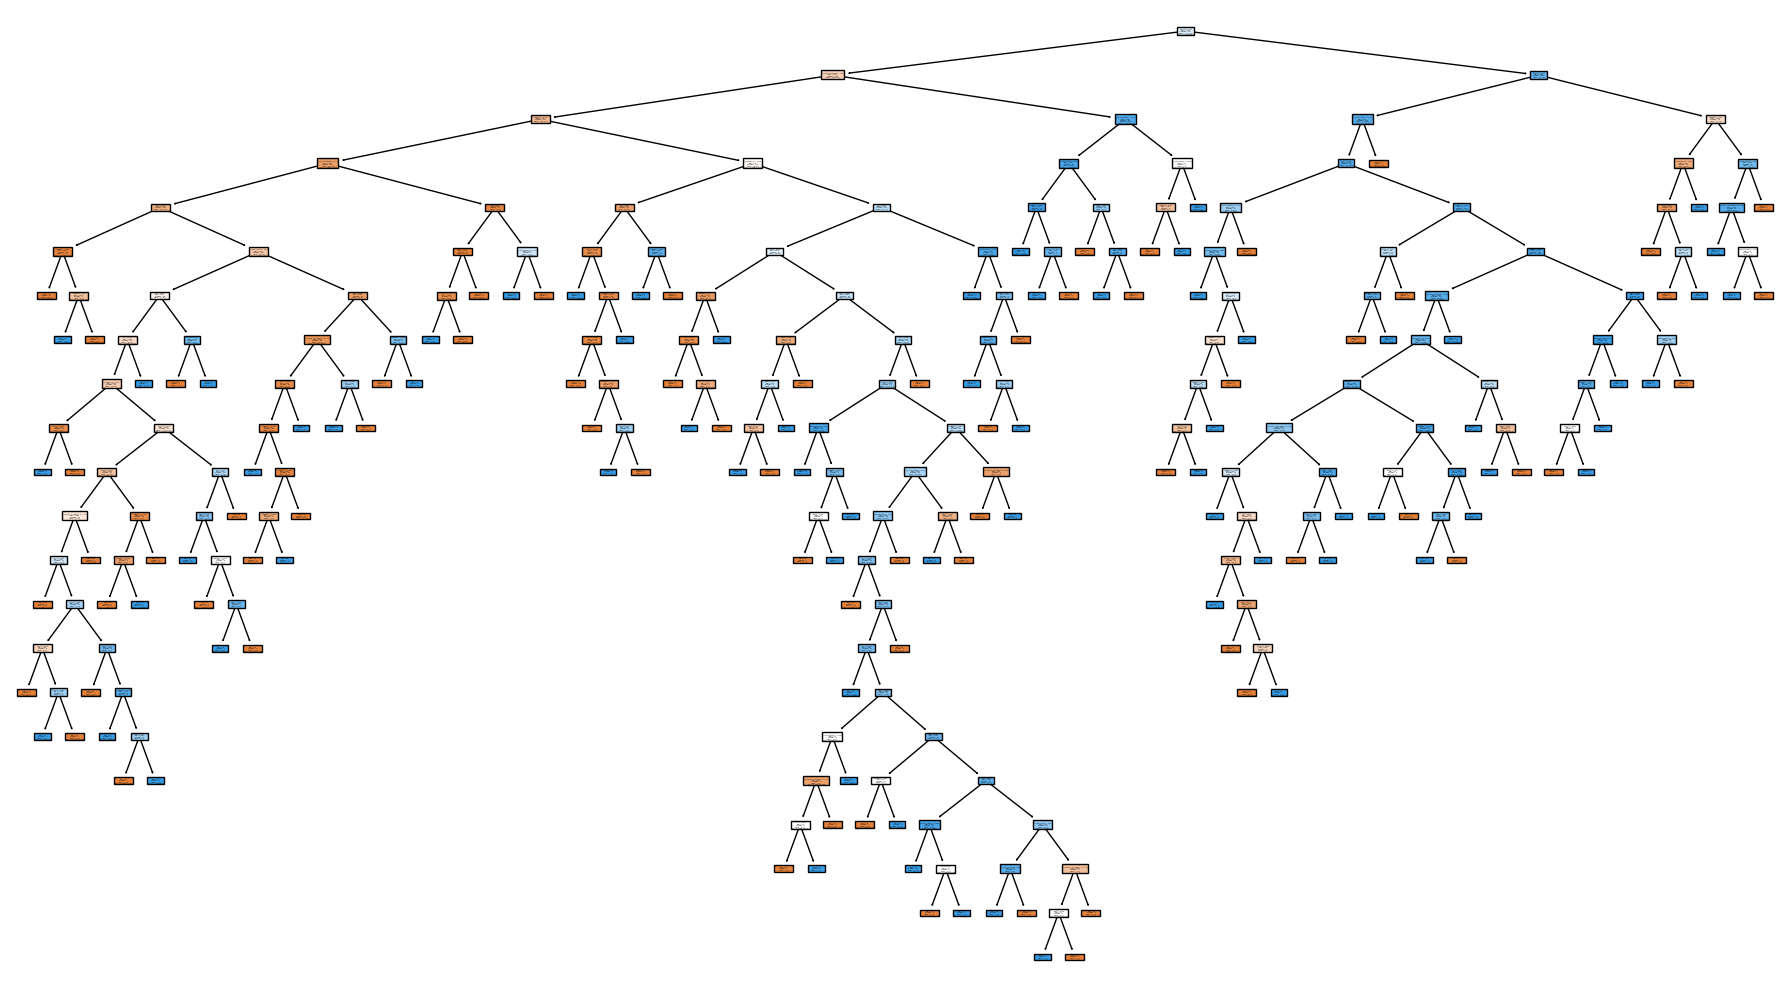

In [123]:
#PLOTTING OUR TREE

from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No-Heart-Disease","Heart-Disease"],
    filled=True
)
plt.tight_layout()
plt.show()



#HERE WE HAVE NOT SPECIFIED PARAMETERS SUCH AS max_depth,min_sample_split etc.


In [124]:
#CASE--2 USING PRUNING TO IMPROVE OUR DECISION TREE MODEL

#CHECK FOR THE BEST VALUE OF MAXIMUM DEPTH OF OUR MODEL
max_depths=[2,3,4,5,6,7,8,9,10]
for depth in max_depths:
  model=DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  accuracy_calculated=model.score(X_test_scaled,y_test)
  recall=recall_score(y_test,y_pred)
  print(f"THE ACCURACY SCORE FOR MAX DEPTH ={depth} IS {accuracy_calculated}")
  print(f"THE RECALL SCORE FOR MAX_DEPTH ={depth} IS {recall}")
  print("\n")

THE ACCURACY SCORE FOR MAX DEPTH =2 IS 0.7228260869565217
THE RECALL SCORE FOR MAX_DEPTH =2 IS 0.5871559633027523


THE ACCURACY SCORE FOR MAX DEPTH =3 IS 0.7228260869565217
THE RECALL SCORE FOR MAX_DEPTH =3 IS 0.5963302752293578


THE ACCURACY SCORE FOR MAX DEPTH =4 IS 0.8152173913043478
THE RECALL SCORE FOR MAX_DEPTH =4 IS 0.8256880733944955


THE ACCURACY SCORE FOR MAX DEPTH =5 IS 0.7989130434782609
THE RECALL SCORE FOR MAX_DEPTH =5 IS 0.8165137614678899


THE ACCURACY SCORE FOR MAX DEPTH =6 IS 0.8152173913043478
THE RECALL SCORE FOR MAX_DEPTH =6 IS 0.8256880733944955


THE ACCURACY SCORE FOR MAX DEPTH =7 IS 0.8097826086956522
THE RECALL SCORE FOR MAX_DEPTH =7 IS 0.7981651376146789


THE ACCURACY SCORE FOR MAX DEPTH =8 IS 0.8097826086956522
THE RECALL SCORE FOR MAX_DEPTH =8 IS 0.8073394495412844


THE ACCURACY SCORE FOR MAX DEPTH =9 IS 0.8260869565217391
THE RECALL SCORE FOR MAX_DEPTH =9 IS 0.8165137614678899


THE ACCURACY SCORE FOR MAX DEPTH =10 IS 0.7934782608695652
THE RECALL SC

THE BEST VALUE OF MAX_DEPTH IS EQUAL TO 8

THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=5 IS = 0.8260869565217391
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=5 IS = 0.8256880733944955


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=10 IS = 0.8315217391304348
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=10 IS = 0.8440366972477065




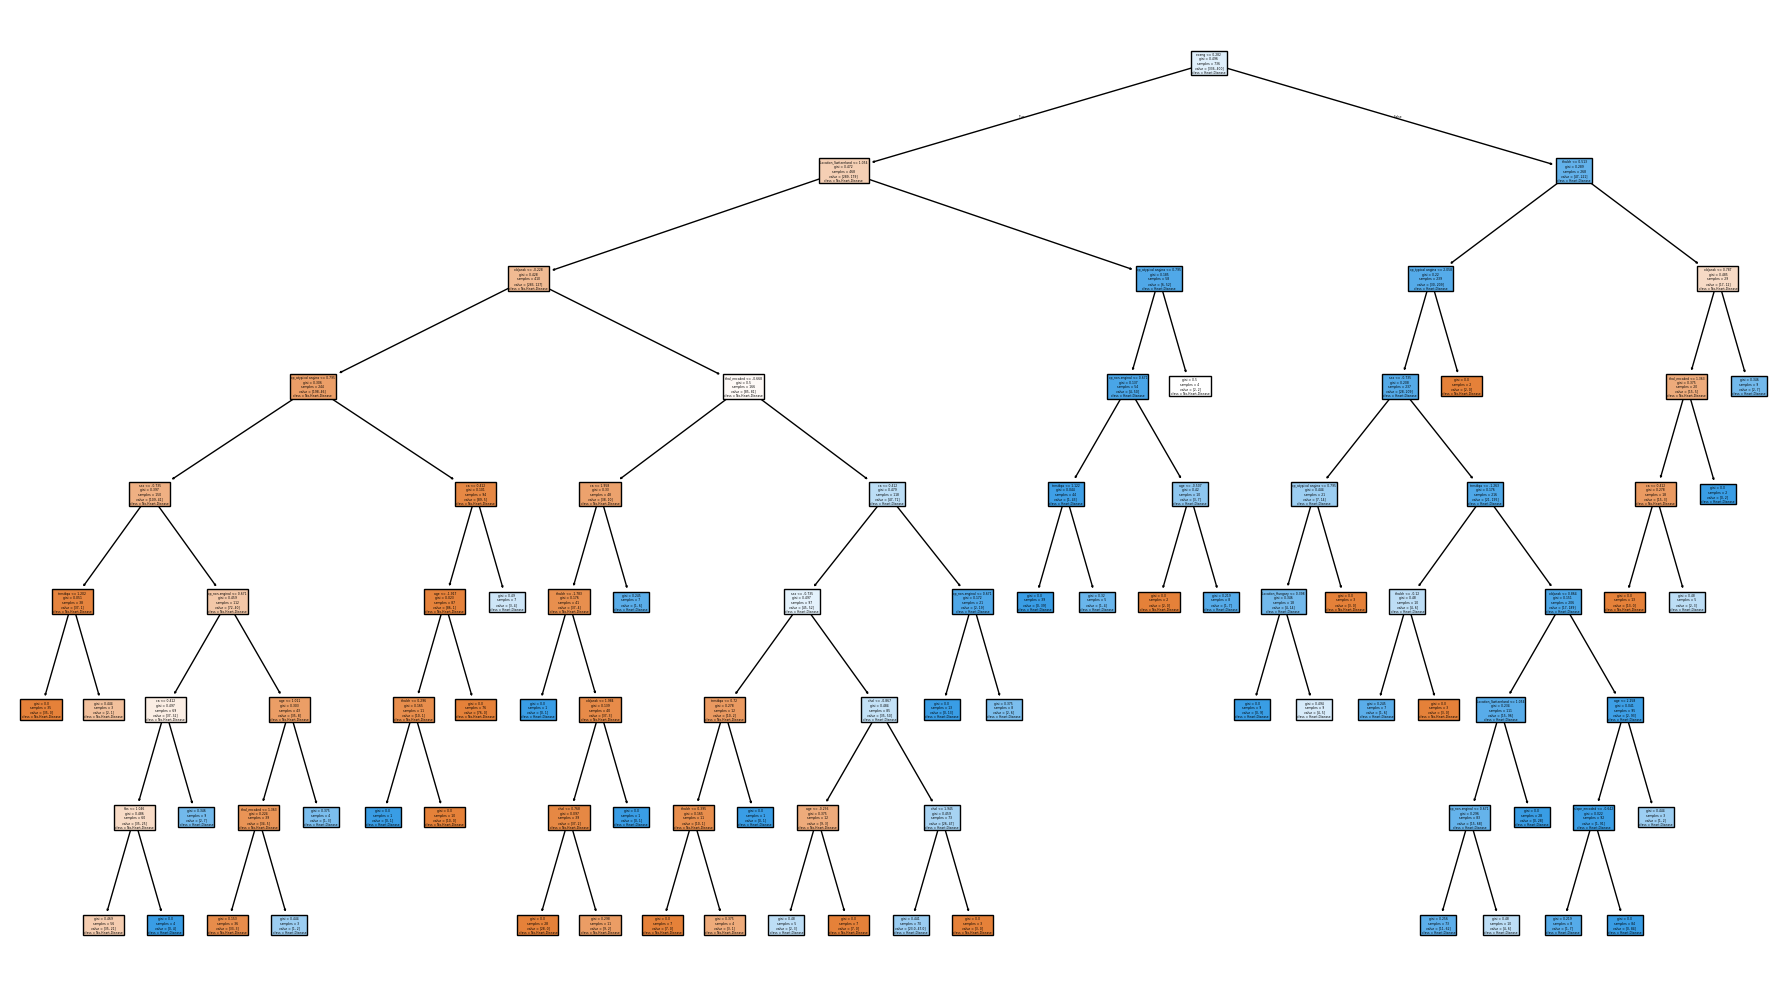

THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=15 IS = 0.8315217391304348
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=15 IS = 0.8348623853211009


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=20 IS = 0.8260869565217391
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=20 IS = 0.8256880733944955


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=25 IS = 0.8315217391304348
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=25 IS = 0.8348623853211009


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=30 IS = 0.8206521739130435
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=30 IS = 0.8073394495412844


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=35 IS = 0.8260869565217391
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=35 IS = 0.8165137614678899


THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=40 IS = 0.8206521739130435
THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT=40 IS = 0.80733944954

In [125]:
#setting max_depth---8

#NEXT PARAMETER ---MIN_SAMPLE_SPLIT

min_sample_split=[5,10,15,20,25,30,35,40]
for sample in min_sample_split:
  model=DecisionTreeClassifier(max_depth=8,min_samples_split=sample)
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  accuracy_calculated=model.score(X_test_scaled,y_test)
  recall=recall_score(y_test,y_pred)
  print(f"THE ACCURACY SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT={sample} IS = {accuracy_calculated}")
  print(f"THE RECALL SCORE FOR MAX_DEPTH--8 AND MIN_SAMPLE_SPLIT={sample} IS = {recall}")
  print("\n")

#MIN_SAMPLES_SPLIT--10 IS THE BEST

  if(sample==10):
    plt.figure(figsize=(18,10))
    plot_tree(
        model,
        feature_names=X.columns,
        class_names=["No-Heart-Disease","Heart-Disease"],
        filled=True,
        max_depth=8
    )
    plt.tight_layout()
    plt.show()


MAX_DEPTH--8 AND
MIN_SAMPLE_SPLIT--10

In [126]:
full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [129]:
path=full_tree.cost_complexity_pruning_path(X_train_scaled,y_train)

In [132]:
ccp_alphas=path.ccp_alphas

In [133]:
ccp_alphas

array([0.        , 0.0008411 , 0.00089595, 0.00108696, 0.0011646 ,
       0.00118886, 0.00118886, 0.00122283, 0.00123518, 0.00123518,
       0.001294  , 0.00131626, 0.00131873, 0.00132294, 0.00132635,
       0.00132782, 0.00134308, 0.0013587 , 0.0013587 , 0.00138745,
       0.00150966, 0.00158919, 0.00163043, 0.00171869, 0.00176357,
       0.00181159, 0.00184934, 0.00190217, 0.00196526, 0.00203804,
       0.00205863, 0.00217391, 0.00217391, 0.0022192 , 0.00231117,
       0.00232652, 0.00232919, 0.00232919, 0.00240143, 0.00241546,
       0.00241768, 0.00244565, 0.00248528, 0.00256062, 0.00258605,
       0.0028262 , 0.00285326, 0.00307795, 0.00314441, 0.00326087,
       0.00340231, 0.00346467, 0.0035241 , 0.00356323, 0.00365437,
       0.00381156, 0.0041911 , 0.00434378, 0.00465839, 0.00469817,
       0.00507829, 0.0055197 , 0.00555228, 0.00637616, 0.00802426,
       0.00937437, 0.01434667, 0.01491486, 0.02406849, 0.04754358,
       0.09052964])

In [144]:
#TRAINING THE MODEL FOR ALL CCP_ALPHA VALUES

tree=[]
for alpha in ccp_alphas:
  model=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  accuracy_calculated=model.score(X_test_scaled,y_test)

  tree.append((model,alpha))

In [155]:
tree

[(DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=42),
  np.float64(0.0)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.0008410973084886131),
                         random_state=42),
  np.float64(0.0008410973084886131)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.0008959514807813466),
                         random_state=42),
  np.float64(0.0008959514807813466)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.0010869565217391302),
                         random_state=42),
  np.float64(0.0010869565217391302)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.0011645962732919257),
                         random_state=42),
  np.float64(0.0011645962732919257)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.001188858695652174),
                         random_state=42),
  np.float64(0.001188858695652174)),
 (DecisionTreeClassifier(ccp_alpha=np.float64(0.001188858695652174),
                         random_state=42),
  np.float64(0.001188858695652174)),
 (Decisi

In [145]:
best_accuracy=0
best_alpha=0

for model,alpha in tree:
  current_accuracy=model.score(X_test_scaled,y_test)
  if current_accuracy>best_accuracy:
    best_accuracy=current_accuracy
    best_alpha=alpha

In [146]:
best_alpha

np.float64(0.0030779456051195204)

In [147]:
best_accuracy

0.8315217391304348

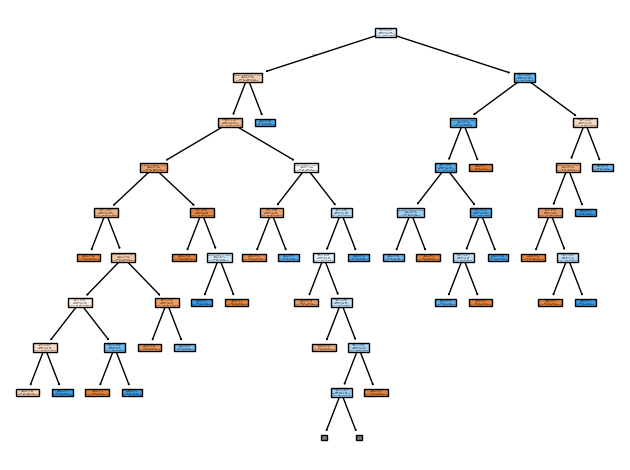

In [152]:
best_model=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)

best_model.fit(X_train_scaled,y_train)

plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["No-Heart-Disease","Heart-Disease"],
    filled=True,
    max_depth=8
)
plt.tight_layout()
plt.show()

In [153]:
print(best_model.score(X_test_scaled,y_test))

0.8315217391304348


In [154]:
y_pred=best_model.predict(X_test_scaled)
print(recall_score(y_test,y_pred))

0.8348623853211009
